In [6]:
import sys
import os

In [7]:
sys.path.append(os.path.abspath("../.."))

In [8]:
from analysis.preprocessing import load_and_clean_CO2_emission_data

In [9]:
df = load_and_clean_CO2_emission_data()
df

,Entity,Code,Year,emissions_total
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
29379,Zimbabwe,ZWE,2020,8490839.0
29380,Zimbabwe,ZWE,2021,10222778.0
29381,Zimbabwe,ZWE,2022,12231845.0
29382,Zimbabwe,ZWE,2023,13443295.0


In [12]:
df = df[df["Year"] >= 1949]

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Configuration pour les graphiques matplotlib
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style("whitegrid")

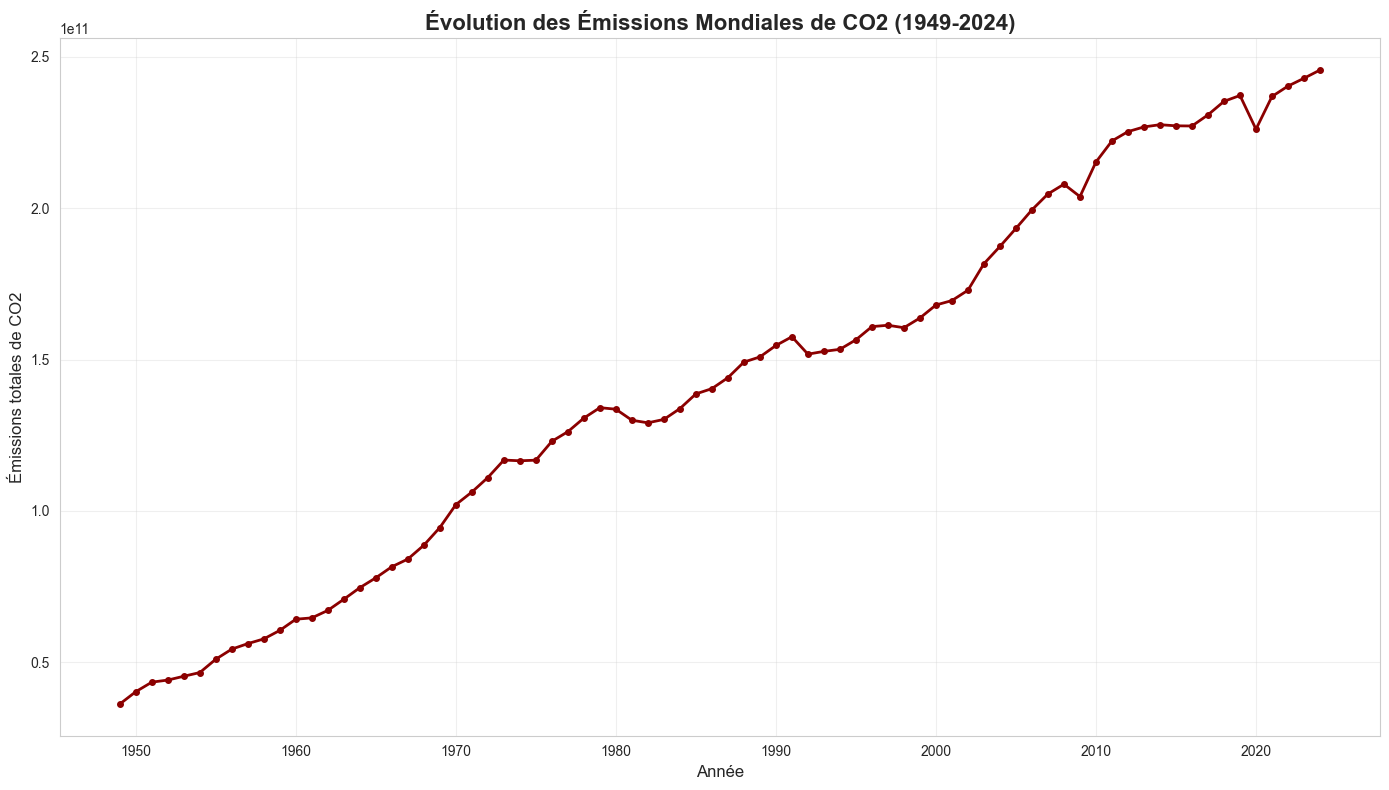

In [14]:
# 1. Évolution des émissions mondiales de CO2 au fil du temps
emissions_mondiales = df.groupby('Year')['emissions_total'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(emissions_mondiales['Year'], emissions_mondiales['emissions_total'],
         marker='o', linewidth=2, markersize=4, color='darkred')
plt.title('Évolution des Émissions Mondiales de CO2 (1949-2024)',
          fontsize=16, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Émissions totales de CO2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

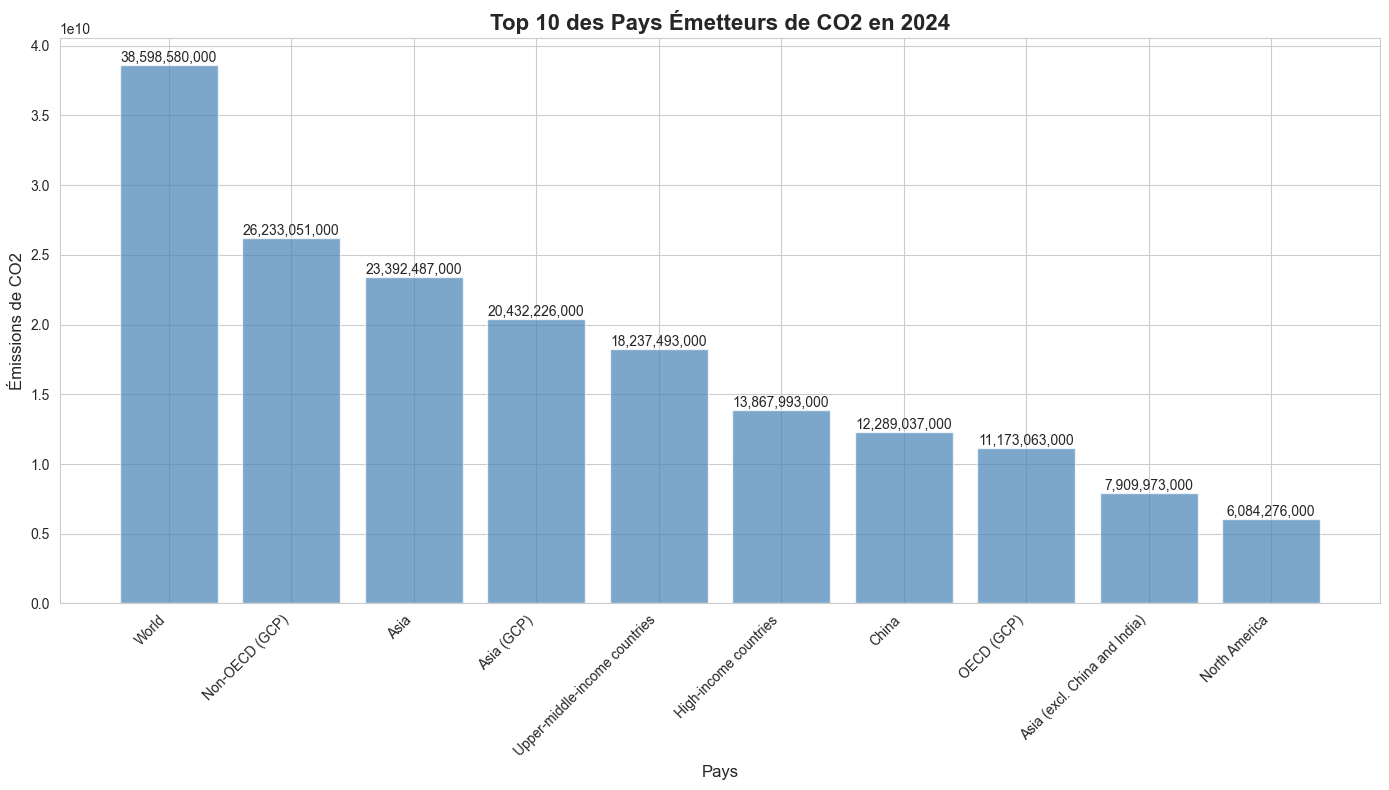

In [15]:
# 2. Top 10 des pays les plus pollueurs (année la plus récente)
annee_recente = df['Year'].max()
top_10_pays = df[df['Year'] == annee_recente].nlargest(10, 'emissions_total')

plt.figure(figsize=(14, 8))
bars = plt.bar(top_10_pays['Entity'], top_10_pays['emissions_total'],
               color='steelblue', alpha=0.7)
plt.title(f'Top 10 des entité Émetteurs de CO2 en {annee_recente}',
          fontsize=16, fontweight='bold')
plt.xlabel('Entité', fontsize=12)
plt.ylabel('Émissions de CO2', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
# 4. Graphique interactif avec Plotly
pays_principaux = ['China', 'United States', 'India', 'Russia', 'Japan', 'France']
fig = px.line(df[df['Entity'].isin(pays_principaux)],
              x='Year', y='emissions_total',
              color='Entity',
              title='Évolution Interactive des Émissions de CO2',
              labels={'emissions_total': 'Émissions de CO2',
                      'Year': 'Année',
                      'Entity': 'Pays'})
fig.show()